# Fraud detection model
Attempting to find algorithms to predict whether a transaction has been fraudulent or not

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score
from xgboost import XGBClassifier
from tensorflow import keras

In [2]:
#import data
data = pd.read_csv('./Data/creditcard.csv')

In [3]:
#Select variables
X = data.iloc[:,:-1]
#Select target
y = data['Class']

In [4]:
#Splitting data into test and training data, with test data accounting for 20% of all data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [5]:
#Print individual data volumes containing test and training data
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 227845
Length of X_test is: 56962
Length of y_train is: 227845
Length of y_test is: 56962


### Logistic Regression

In [6]:
#Create an instance of Logistic Regression
LR = LogisticRegression(random_state=0)

In [7]:
#Learning the algorithm on training data
LR.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [8]:
#Predict data on test data
y_predict = LR.predict(X_test)

In [9]:
matrix = confusion_matrix(y_test,y_predict)

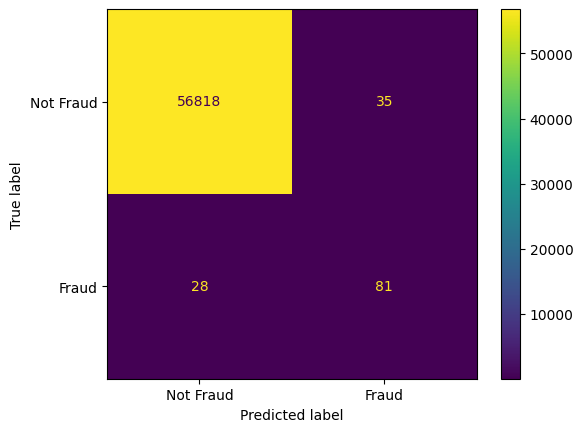

In [10]:
#Create Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Not Fraud', 'Fraud'])
cm_display.plot()

In [11]:
#Print precision for Logistic Regression
print(f"The precision for logistic regression is {precision_score(y_test,y_predict)*100:.2f}%")

The precision for logistic regression is 69.83%


### Decision Tree

In [12]:
#Create an instance of Decision Tree Classifier
DT = DecisionTreeClassifier(random_state=0)

In [13]:
#Learning the algorithm on training data
DT.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
#Predict data on test data
y_predict_dt = DT.predict(X_test)

In [15]:
dt_matrix = confusion_matrix(y_test,y_predict_dt)

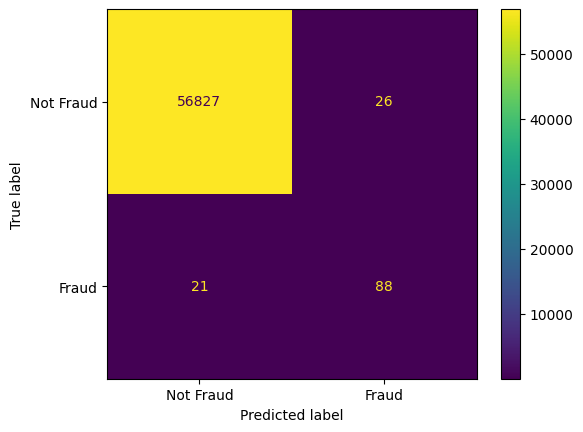

In [16]:
#Create Confusion Matrix
dt_cm = ConfusionMatrixDisplay(confusion_matrix=dt_matrix, display_labels = ['Not Fraud', 'Fraud'])
dt_cm.plot()

In [17]:
#Print precision for Decision Tree Classifier
print(f"The precision for decision tree is {precision_score(y_test,y_predict_dt)*100:.2f}%")

The precision for decision tree is 77.19%


### Random Forest

In [18]:
#Create an instance of Random Forest Classifier
RF =  RandomForestClassifier(n_estimators=250,random_state=0,n_jobs=4)

In [19]:
#Learning the algorithm on training data
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, n_jobs=4, random_state=0)

In [20]:
#Predict data on test data
y_predict_rf = RF.predict(X_test)

In [21]:
rf_matrix = confusion_matrix(y_test,y_predict_rf)

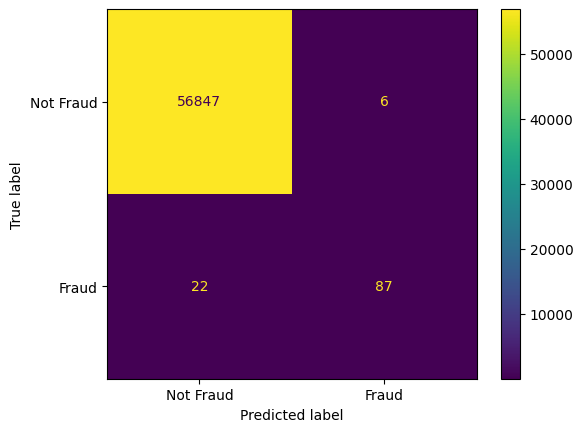

In [22]:
#Create Confusion Matrix
dt_cm = ConfusionMatrixDisplay(confusion_matrix=rf_matrix, display_labels = ['Not Fraud', 'Fraud'])
dt_cm.plot()

In [23]:
#Print precision for Random Forest Classifier
print(f"The precision for random forest is {precision_score(y_test,y_predict_rf)*100:.2f}%")

The precision for random forest is 93.55%


### XGBoost

In [24]:
##Create an instance of Extreme Gradient Boosting Classifier
xgb = XGBClassifier(n_estimators = 250, learning_rate = 0.01, objective='binary:logistic')

In [25]:
#Learning the algorithm on training data
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [26]:
#Predict data on test data
y_predict_xgb = xgb.predict(X_test)

In [27]:
xgb_matrix = confusion_matrix(y_test,y_predict_xgb)

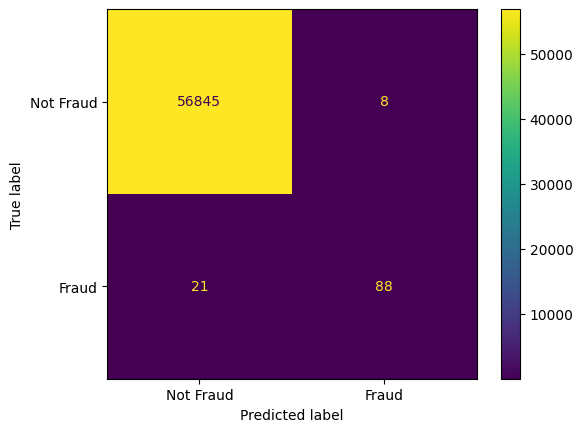

In [28]:
#Create Confusion Matrix
xgb_cm = ConfusionMatrixDisplay(confusion_matrix=xgb_matrix, display_labels = ['Not Fraud', 'Fraud'])
xgb_cm.plot()

In [29]:
#Print precision for Extreme Gradient Boosting Classifier
print(f"The precision for XGBoostClassifier is {precision_score(y_test,y_predict_xgb)*100:.2f}%")

The precision for XGBoostClassifier is 91.67%


### Tensorflow

In [30]:
#Creation of a variable for the input shape for the neural network
input_shape = [X_train.shape[1]]

In [31]:
#Creation of a neural network model
model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape = input_shape),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [32]:
#Added optimizer and loss function
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy',keras.metrics.Precision()],
)

In [33]:
#Added early stopping function for model 
early_stopping = keras.callbacks.EarlyStopping(
    patience = 5,
    min_delta = 0.0001,
    restore_best_weights = True
)

In [34]:
#Learning a neural network on training data
model_history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    batch_size = 512,
    epochs = 200,
    callbacks = [early_stopping],
)

Epoch 1/200
446/446 [==============================] - 5s 8ms/step - loss: 0.1179 - binary_accuracy: 0.9647 - precision: 0.0317 - val_loss: 0.0103 - val_binary_accuracy: 0.9992 - val_precision: 0.9114
Epoch 2/200
446/446 [==============================] - 3s 8ms/step - loss: 0.0074 - binary_accuracy: 0.9992 - precision: 0.7975 - val_loss: 0.0053 - val_binary_accuracy: 0.9994 - val_precision: 0.8654
Epoch 3/200
446/446 [==============================] - 3s 8ms/step - loss: 0.0052 - binary_accuracy: 0.9992 - precision: 0.8215 - val_loss: 0.0043 - val_binary_accuracy: 0.9993 - val_precision: 0.9855
Epoch 4/200
446/446 [==============================] - 3s 7ms/step - loss: 0.0042 - binary_accuracy: 0.9993 - precision: 0.8562 - val_loss: 0.0043 - val_binary_accuracy: 0.9994 - val_precision: 0.9186
Epoch 5/200
446/446 [==============================] - 3s 7ms/step - loss: 0.0036 - binary_accuracy: 0.9994 - precision: 0.8660 - val_loss: 0.0040 - val_binary_accuracy: 0.9994 - val_precision: 0.

<Axes: title={'center': 'Precision'}>

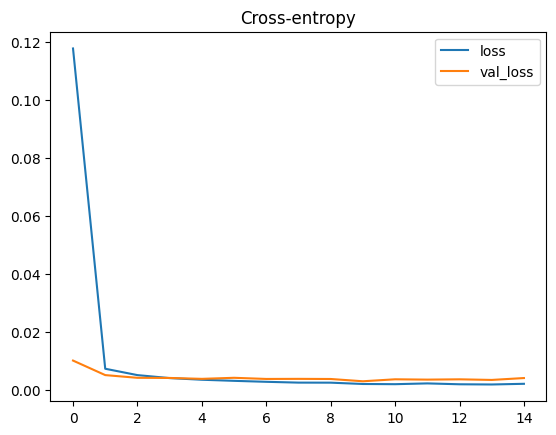

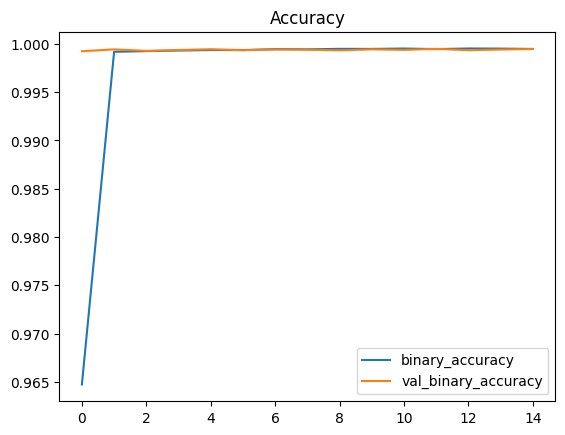

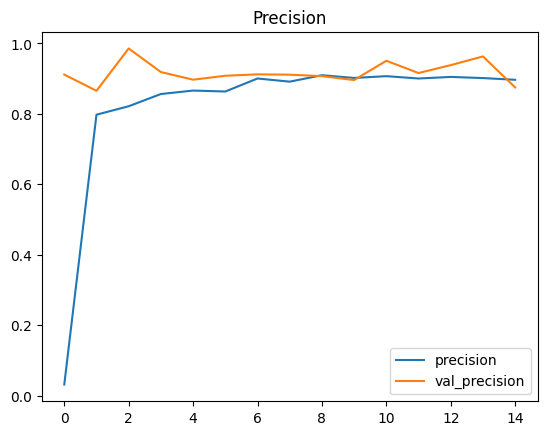

In [36]:
#Drawing a graph for the learning history of a neural network
history_df = pd.DataFrame(model_history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = "Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title = "Accuracy")
history_df.loc[:, ['precision', 'val_precision']].plot(title = "Precision")

In this experiment, the most considered metric was the precision of the algorithm, as it was most important to recognise whether embezzlement had occurred (type I Error).
The random forest algorithm showed the highest precision, while the logistic regression algorithm performed the worst. The algorithms XGBoost and neural networks did just as well as the random forest algorithm.